In [73]:
import pandas as pd 

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

import seaborn as sns 

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from scipy.stats import pearsonr
from scipy import stats

# Task 1 
- How much of the data are we missing?
- Do you see any features that you do not understand the values of?
- Which information could we potentially use to determine the crew of the Titanic in this dataset?

In [22]:
df = pd.read_csv('../data/Titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.shape

(891, 12)

In [24]:
# missing data 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
df['Age'] = df['Age'].fillna(0)

In [28]:
# embarked is indicate as the crew of titanics
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

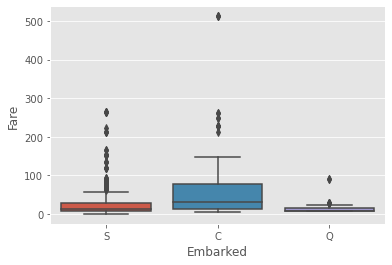

In [29]:
sns.boxplot(x="Embarked", y="Fare", data=df)

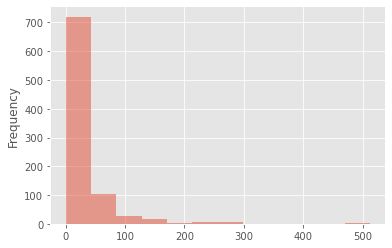

In [30]:
df['Fare'].plot.hist(bins=12, alpha=0.5)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

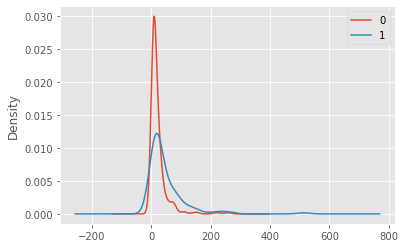

In [26]:
df.groupby('Survived')['Fare'].plot(kind='kde', legend=True)

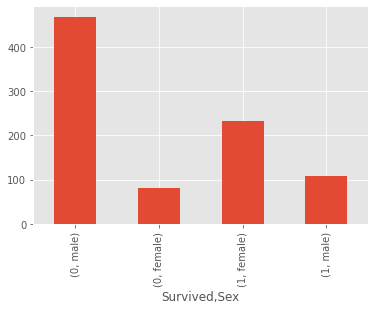

In [27]:
df.groupby('Survived')['Sex'].value_counts().plot(kind='bar')

# Task 2 

- Find two features where a certain group has a noticeable high mortality rate.
- Explain why this is the case with your knowledge of the dataset (having seen the movie might help, see 👉.

In [63]:
# died_subset = df[df['Survived'] == 0]
# live_subset = df[df['Survived'] != 0]
                 
# ax1 = died_subset.plot(x='somefeature', y='someotherfeature',label='Died', color='red', kind='scatter')
# ax2 = live_subset.plot(x='somefeature', y='someotherfeature', label='Survived', color='green', kind='scatter',ax=ax1)


# sns.barplot(x="Survived", y="Pclass", data=df)

# df.groupby(['Pclass','Survived']).value_counts()
# df.groupby('Survived')['Pclass'].value_counts().plot(kind='bar')

In [59]:
df_class = df.groupby(['Pclass','Survived']).agg({'PassengerId':'count'}).reset_index()

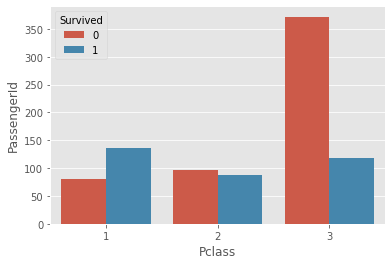

In [60]:
sns.barplot(x="Pclass", y="PassengerId", hue='Survived', data=df_class)

In [61]:
df_sex = df.groupby(['Sex','Survived']).agg({'PassengerId':'count'}).reset_index()

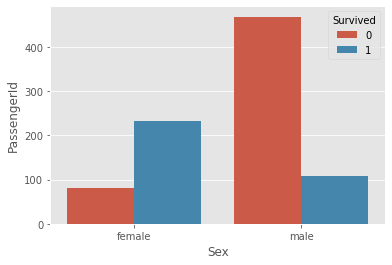

In [62]:
sns.barplot(x="Sex", y="PassengerId", hue='Survived', data=df_sex)

conclusion  
1. men had higher mortality rate because in the movie, women and children are first priority. 
2. 3 passenger class had higher mortality rate becuase maybe most of them trapped in lower deck. 

# Task 3
- Set `Sex` to $x$, and `Pclass` to $y$. What can you conclude?
- Set `Age` to $x$, and `Fare` to $y$. Do these features correlate?
- Split the above plot by `Survived`, do you see a pattern in the data?

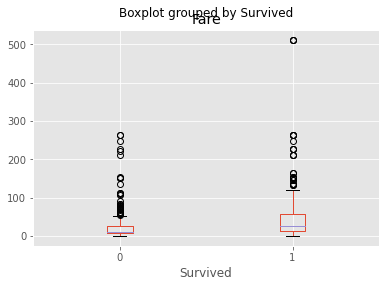

In [68]:
df.boxplot(column=['Fare'], by='Survived')

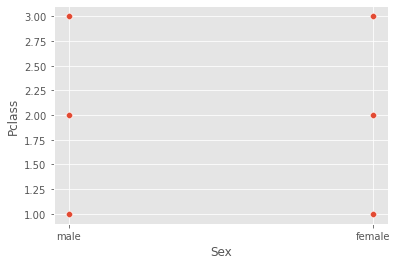

In [65]:
sns.scatterplot(data=df, x="Sex", y="Pclass")

In [72]:
pearsonr(df['Age'], df['Fare'])  # run df['Age'].fillna(0) before!

(0.13551585352705103, 4.9462438889517463e-05)

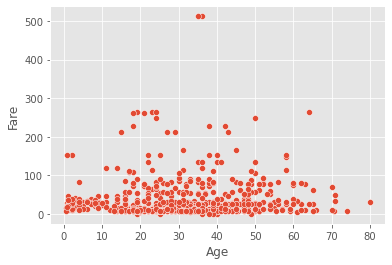

In [66]:
sns.scatterplot(data=df, x="Age", y="Fare")

conclusion 
1. there's no correlation in first scatter plot 
2. there's an outlier and correlation score is low 

# Task 4 
Determine a likely ticket price to survive the Titanic.

In [74]:
stats.ttest_ind(df['Age'], df['Fare'])

Ttest_indResult(statistic=-4.75908347190967, pvalue=2.101787419440476e-06)